<a href="https://colab.research.google.com/github/ibader85/AdvancedAnalytics/blob/main/NumPy_and_Pandas_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

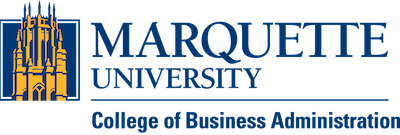

# BUAN 4061: Advanced Business Analytics
# NumPy and Pandas 2

Instructor: Dr. Badar Al Lawati

Some of the credit for this notebook goes to McIntire et al.: https://www.learndatasci.com/tutorials/python-pandas-tutorial-complete-introduction-for-beginners/

Also Pandas contributors: https://github.com/pandas-dev/pandas/graphs/contributors

#Pandas

In [ ]:
import numpy as np
import pandas as pd

##Core components of pandas: Series and DataFrames
The primary two components of pandas are the Series and DataFrame.

A Series is essentially a column, and a DataFrame is a multi-dimensional table made up of a collection of Series.

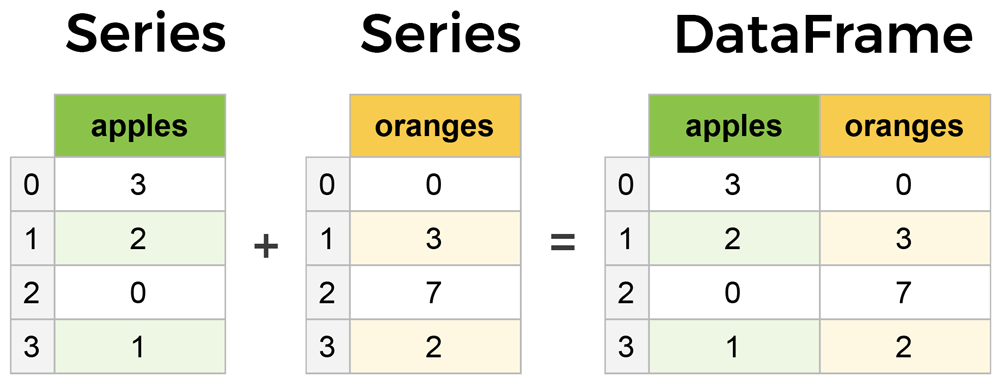

##Creating columns (Series) from scratch

In [ ]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

Creating Series of dates:

In [ ]:
dates = pd.date_range('20240101', periods=6)
#creates a pandas DatetimeIndex containing dates starting from '20240101' (January 1, 2024) and consisting of 6 periods (days in this case)
dates

DatetimeIndex(['2024-01-01', '2024-01-02', '2024-01-03', '2024-01-04',
               '2024-01-05', '2024-01-06'],
              dtype='datetime64[ns]', freq='D')

Creating a categorical column:

In [50]:
test_train = pd.Categorical(["test", "train", "test", "train", "train", "train"])
test_train

['test', 'train', 'test', 'train', 'train', 'train']
Categories (2, object): ['test', 'train']

##Creating DataFrames from Columns

In [52]:
table_dict = {'Date': dates, 'Type_of_Learning': test_train, 'Value': s}
#The table_dict dictionary contains three keys: 'Date', 'Type_of_Learning', and 'Value', corresponding to the dates, types of learning, and values, respectively
table_dict
#The structure of table_dict suggests that it's meant to be used to create a tabular dataset where each row represents a combination of date, type of learning, and corresponding value

{'Date': DatetimeIndex(['2024-01-01', '2024-01-02', '2024-01-03', '2024-01-04',
                '2024-01-05', '2024-01-06'],
               dtype='datetime64[ns]', freq='D'),
 'Type_of_Learning': ['test', 'train', 'test', 'train', 'train', 'train']
 Categories (2, object): ['test', 'train'],
 'Value': 0    1.0
 1    3.0
 2    5.0
 3    NaN
 4    6.0
 5    8.0
 dtype: float64}

In [ ]:
df1 = pd.DataFrame(table_dict)
df1

,Date,Type_of_Learning,Value
0,2024-01-01,test,1.0
1,2024-01-02,train,3.0
2,2024-01-03,test,5.0
3,2024-01-04,train,NaN
4,2024-01-05,train,6.0
5,2024-01-06,train,8.0


##Creating DataFrames from scratch
There are many ways to create a DataFrame from scratch, but a great option is to just use a simple dict

In [ ]:
data = {
        'apples': [3, 2, 0, 1],
        'oranges': [0, 3, 7, 2]
        }

In [ ]:
purchases = pd.DataFrame(data)

In [ ]:
purchases

,apples,oranges
0,3,0
1,2,3
2,0,7
3,1,2


How did that work?

Each (key, value) item in data corresponds to a column in the resulting DataFrame

The Index of this DataFrame was given to us on creation as the numbers 0-3, but we could also create our own when we initialize the DataFrame

Let's have customer names as our index:

In [ ]:
purchases = pd.DataFrame(data, index=['June', 'Robert', 'Lily', 'David'])

purchases

,apples,oranges
June,3,0
Robert,2,3
Lily,0,7
David,1,2


So now we could locate a customer's order by using their name:

In [ ]:
purchases.loc['June']

apples     3
oranges    0
Name: June, dtype: int64

##How to read in data
###Reading data from CSVs

In [ ]:
df2 = pd.read_csv('http://saffarizadeh.com/ET/purchases.csv')

In [ ]:
df2

,Unnamed: 0,apples,oranges
0,June,3,0
1,Robert,2,3
2,Lily,0,7
3,David,1,2


CSVs don't have indexes like our DataFrames, so all we need to do is just designate the index_col when reading:

In [ ]:
df2 = pd.read_csv('http://saffarizadeh.com/ET/purchases.csv', index_col=0)

df2

,apples,oranges
June,3,0
Robert,2,3
Lily,0,7
David,1,2


##Reading data from JSON

If you have a JSON file — which is essentially a stored Python `dict` — pandas can read this just as easily:

In [ ]:
df3 = pd.read_json('http://saffarizadeh.com/ET/purchases.json')

df3

,apples,oranges
June,3,0
Robert,2,3
Lily,0,7
David,1,2


Notice this time our index came with us correctly since using JSON allowed indexes to work through nesting

Feel free to open purchases.json in a notepad so you can see how it works

##Converting back to a CSV or JSON

So after extensive work on cleaning your data, you’re now ready to save it as a file of your choice

Similar to the ways we read in data, pandas provides intuitive commands to save it:

In [ ]:
df2['apples'][0] = 999 #updates the value of the first row in the 'apples' column to be 999
df2.to_csv('new_purchases.csv')

In [ ]:
df3.to_json('new_purchases.json')

##Reading data from Excel

In [ ]:
excel_file_address = 'http://saffarizadeh.com/ET/Students.xlsx'

In [ ]:
students_sheet1 = pd.read_excel(excel_file_address, sheet_name=0, index_col=0)

#Exploring the DataFrame
## `head` and `tail`

`.head()` outputs the first five rows of your DataFrame by default, but we could also pass a number as well: `movies_df.head(10)` would output the top ten rows, for example.

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html

In [ ]:
students_sheet1.head(2)

,First Name,Last Name,Quiz 1,Quiz 2,Attendance
ID,,,,,
1,Amalia,Pearson,90,80,5
2,Leyton,Richmond,100,80,4


To see the last five rows use `.tail()`. `tail()` also accepts a number, and in this case we printing the bottom two rows

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.tail.html

In [ ]:
students_sheet1.tail(2)

,First Name,Last Name,Quiz 1,Quiz 2,Attendance
ID,,,,,
4,Hafsah,Cotton,90,90,4
5,Cloe,Perez,80,90,5


In [ ]:
students_sheet2 = pd.read_excel(excel_file_address, sheet_name=1)

In [ ]:
students_sheet2.head()

,Number of Sessions,Quiz Weight,Attendance Weight
0,5,0.7,0.3


In [ ]:
students_sheet3 = pd.read_excel(excel_file_address, sheet_name=2, index_col=0)

In [ ]:
students_sheet3.head()

,Email
ID,
1,a@b.com
2,b@c.com
3,NaN
4,NaN
5,NaN


You can also use `shape` to get the dimensions of the DataFrame.

In [ ]:
students_sheet3.shape

(5, 1)

#`info` and `describe`
`.info()` should be one of the very first commands you run after loading your data

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html

In [ ]:
students_sheet1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 1 to 5
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   First Name  5 non-null      object
 1   Last Name   5 non-null      object
 2   Quiz 1      5 non-null      int64 
 3   Quiz 2      5 non-null      int64 
 4   Attendance  5 non-null      int64 
dtypes: int64(3), object(2)
memory usage: 240.0+ bytes


`describe()` shows a quick statistic summary of your data. Using `describe()` on an entire DataFrame we can get a summary of the distribution of continuous variables. `.describe()` can also be used on a categorical variable to get the count of rows, unique count of categories, top category, and freq of top category.

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html



In [ ]:
students_sheet1.describe()

,Quiz 1,Quiz 2,Attendance
count,5.000000,5.0000,5.00000
mean,89.000000,88.0000,4.20000
std,7.416198,8.3666,0.83666
min,80.000000,80.0000,3.00000
25%,85.000000,80.0000,4.00000
50%,90.000000,90.0000,4.00000
75%,90.000000,90.0000,5.00000
max,100.000000,100.0000,5.00000


##`index` and `columns`

In [ ]:
students_sheet1.index

Int64Index([1, 2, 3, 4, 5], dtype='int64', name='ID')

In [ ]:
students_sheet1.columns

Index(['First Name', 'Last Name', 'Quiz 1', 'Quiz 2', 'Attendance'], dtype='object')

##Slicing Rows
We can slice the rows by selecting via `[]`

In [ ]:
students_sheet1[0:2]

,First Name,Last Name,Quiz 1,Quiz 2,Attendance
ID,,,,,
1,Amalia,Pearson,90,80,5
2,Leyton,Richmond,100,80,4


#`loc` and `iloc`
- `.loc` - locates by row name, which may or may not be a number (Selection by Label)
- `.iloc` - locates by row index (Selection by Position)

One important distinction between using `.loc` and `.iloc` to select multiple rows is that:

- `.loc` is both ends inclusive
- `.iloc` is inclusive start, exclusive end (similar to Python lists and numpy arrays)

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iloc.html

In [ ]:
students_sheet1.loc[1:2]

,First Name,Last Name,Quiz 1,Quiz 2,Attendance
ID,,,,,
1,Amalia,Pearson,90,80,5
2,Leyton,Richmond,100,80,4


In [ ]:
students_sheet1.iloc[0:2]

,First Name,Last Name,Quiz 1,Quiz 2,Attendance
ID,,,,,
1,Amalia,Pearson,90,80,5
2,Leyton,Richmond,100,80,4


##Slicing Columns
We can slice the columns by selecting via `[]`.

In [ ]:
students_sheet1["Quiz 1"]

ID
1     90
2    100
3     85
4     90
5     80
Name: Quiz 1, dtype: int64

This will return a Series

To extract a column as a DataFrame, you need to pass a list of column names

In our case that's a list of just a single column

In [ ]:
students_sheet1[["Quiz 1"]]

,Quiz 1
ID,
1,90
2,100
3,85
4,90
5,80


You can also pass any other list of column names

In [55]:
students_sheet1[students_sheet1.columns[1:4]] # How does this work?
#selects columns 2 to 4 (columns are 0-indexed)

,Last Name,Quiz 1,Quiz 2
ID,,,
1,Pearson,90,80
2,Richmond,100,80
3,Stanton,85,100
4,Cotton,90,90
5,Perez,80,90


##`loc` and `iloc`

In [ ]:
students_sheet1.loc[:, "Last Name": "Quiz 2"]

,Last Name,Quiz 1,Quiz 2
ID,,,
1,Pearson,90,80
2,Richmond,100,80
3,Stanton,85,100
4,Cotton,90,90
5,Perez,80,90


In [ ]:
students_sheet1.iloc[:, 1:4]

,Last Name,Quiz 1,Quiz 2
ID,,,
1,Pearson,90,80
2,Richmond,100,80
3,Stanton,85,100
4,Cotton,90,90
5,Perez,80,90


**Find Column Names that Contain a Specific Keyword**

In [ ]:
quiz_columns = [column for column in students_sheet1.columns if "Quiz" in column]
#creates a list called quiz_columns containing the names of columns in the DataFrame students_sheet1 that contain the substring "Quiz"
#It iterates over each column name in students_sheet1.columns and checks if "Quiz" is present in the column name
#If it is, the column name is added to the quiz_columns list

In [ ]:
students_sheet1[quiz_columns]

,Quiz 1,Quiz 2
ID,,
1,90,80
2,100,80
3,85,100
4,90,90
5,80,90


##Access a single value for a row/column pair

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.at.html

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iat.html

Using the methods we've already learned:

In [57]:
students_sheet1["Quiz 1"][1]
#accesses the value in the "Quiz 1" column of the DataFrame students_sheet1 at the index position 1

90

In [58]:
students_sheet1["Quiz 1"].iloc[0]
#accesses the value in the "Quiz 1" column of the DataFrame students_sheet1 at the index position 0 using the iloc indexer

90

In [60]:
students_sheet1.loc[1, "Quiz 1"]
#accesses the value in the "Quiz 1" column of the DataFrame students_sheet1 at the row with index label 1

90

In [61]:
students_sheet1.iloc[0, 2]
#accesses the value at the first row and third column (0-based indexing) of the DataFrame students_sheet1

90

Using `at` and `iat` (preferred method):

In [62]:
students_sheet1.at[1, "Quiz 1"]
#retrieves the value located at row with index label 1 and column with label "Quiz 1" in the DataFrame

90

In [63]:
#The iat accessor in Pandas is used to access a specific cell in a DataFrame by integer location
students_sheet1.iat[0, 2]
#retrieves the value located at row with integer index 0 and column with integer index 2 in the DataFrame

90